In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def asset_paths(S: float, mu: float, sigma: float, div: float, T: int, n_reps: int, n_steps: int) -> np.ndarray:
  dt = T / n_steps
  nudt = (mu - div - 0.5*sigma*sigma)*dt
  sidt = sigma*np.sqrt(dt)
  z = nudt + sidt*np.random.normal(size=(n_reps, n_steps))
  paths = np.cumsum(np.concatenate((np.full((n_reps, 1), np.log(S)), z), axis=1), axis=1)

  return np.exp(paths)

In [5]:
n_reps = 500
n_steps = 100
paths = asset_paths(100.0, 0.06, 0.20, 1, 0.03, n_reps, n_steps)

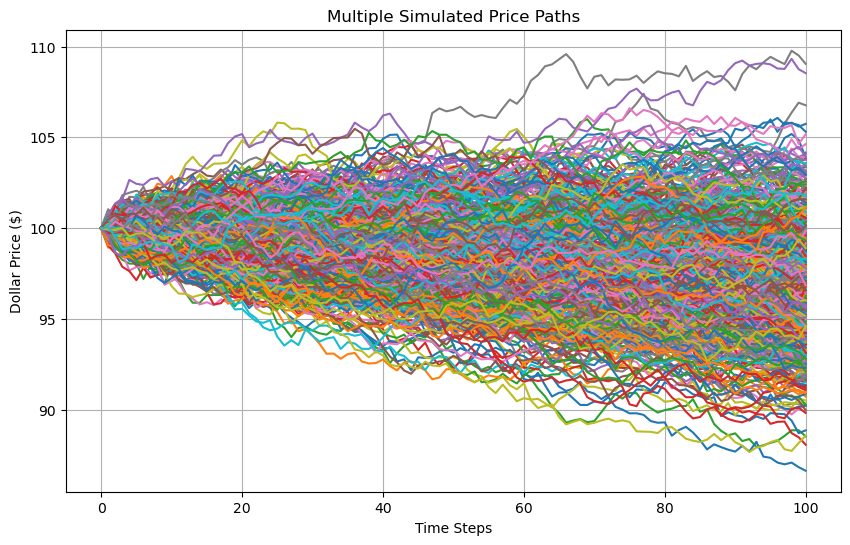

In [6]:
# Plotting
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

for i in range(n_reps):
    plt.plot(paths[i])

plt.xlabel('Time Steps')
plt.ylabel('Dollar Price ($)')
plt.title('Multiple Simulated Price Paths')
plt.grid(True)
plt.show()

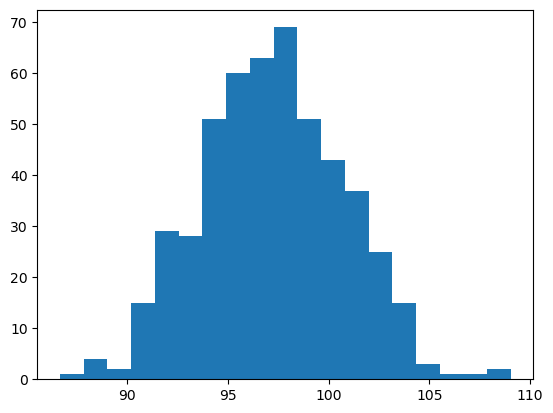

In [7]:
plt.hist(paths[:,-1], bins='auto');

In [8]:
call_t = np.maximum(paths[:, -1] - 100.0, 0.0)